<a href="https://colab.research.google.com/github/LikhanBiswas/Minsk/blob/main/inceptionV3_with_25k_image_with_20_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
]from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/real vs fake/train'
valid_path = '/content/drive/MyDrive/real vs fake/test'

In [ ]:
inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inceptionv3.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/real vs fake/train/*')

In [ ]:
x = Flatten()(inceptionv3.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inceptionv3.input, outputs=prediction)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/real vs fake/train',
                                                 target_size = (224, 224),
                                                 batch_size = 100,
                                                 class_mode = 'categorical')

Found 15024 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/real vs fake/test',
                                            target_size = (224, 224),
                                            batch_size = 100,
                                            class_mode = 'categorical')

Found 10000 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
151/151 [==============================] - 6667s 44s/step - loss: 0.8012 - accuracy: 0.9640 - val_loss: 0.0121 - val_accuracy: 0.9976
Epoch 2/20
151/151 [==============================] - 195s 1s/step - loss: 0.2779 - accuracy: 0.9862 - val_loss: 0.0079 - val_accuracy: 0.9984
Epoch 3/20
151/151 [==============================] - 193s 1s/step - loss: 0.1783 - accuracy: 0.9882 - val_loss: 0.0105 - val_accuracy: 0.9987
Epoch 4/20
151/151 [==============================] - 193s 1s/step - loss: 0.0824 - accuracy: 0.9936 - val_loss: 0.0119 - val_accuracy: 0.9990
Epoch 5/20
151/151 [==============================] - 193s 1s/step - loss: 0.0460 - accuracy: 0.9963 - val_loss: 0.0062 - val_accuracy: 0.9990
Epoch 6/20
151/151 [==============================] - 194s 1s/step - loss: 0.0148 - accuracy: 0.9981 - val_loss: 0.0719 - val_accuracy: 0.9945
Epoch 7/20
151/151 [==============================] - 194s 1s/step - loss: 0.0347 - accuracy: 0.9972 - val_loss: 0.0105 - val_accuracy: 0.99

In [ ]:
import matplotlib.pyplot as plt

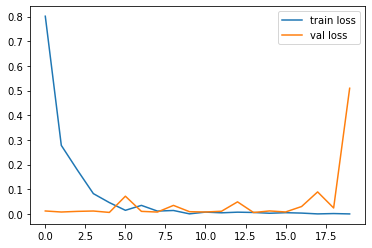

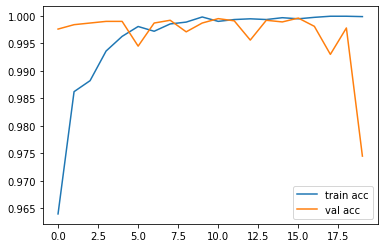

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')